In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
Total_budget = 18
period = 3
Repeat =10
for dataset_name in ['cardiotocography']:
    
    Models = np.zeros((7,Total_budget//period,Repeat ))
    
    Transpoint =  np.zeros((2,Repeat))
    
    run_index_list = list(range(Repeat))
    
    for i in range(len(run_index_list)):
#  ['cardiotocography','statlog-landsat','yeast','waveform','wine-quality-white']
        run_index = run_index_list[i]
#         result = [acc_rand_list, acc_entropy_list, acc_margin_list, acc_base_list, acc_dpp_list_old,acc_a1_list,acc_a2_list, Status_list1, Status_list2, e_index,margin_index,base_index,dpp_index,a1_index,a2_index ]
    #     results = np.array(result,dtype=object)

        path = 'exp_small_dataset/'

        name =  f'{dataset_name}_{run_index}'
    #     np.save(path+name+'.npy', results)
        result = np.load(path+name+'.npy',allow_pickle=True)
        
        [acc_rand_list, acc_entropy_list, acc_margin_list, acc_base_list, acc_dpp_list_old,acc_a1_list,acc_a2_list, Status_list1, Status_list2, e_index,margin_index,base_index,dpp_index,a1_index,a2_index ] = result
        
        
        for j in range(7):
            data = result[j]
            Models[j,:,i] = np.mean(data[::3,1,-20:],axis = 1)
        
        Transpoint[0,i] = np.mean(Status_list1)
        Transpoint[1,i] = np.mean(Status_list2)
        

In [20]:
# Status_list1

In [21]:
Summaray = np.zeros((7,Total_budget//period))
Summaray_var = np.zeros((7,Total_budget//period))
for j in range(7):
    for i in range(Total_budget//period):
        Summaray[j,i] = np.mean(Models[j,i,:])
        
        Summaray_var[j,i] = np.var(Models[j,i,:])

In [22]:
# fig=plt.figure(dpi=500)
font1={'font.family':'serif',
        'font.serif':'Times New Roman',
        'font.style':'normal',
        'font.weight':'bold'}#or large,small

       
plt.rcParams.update(font1)
plt.rcParams['text.usetex'] = False

# ax = fig.add_subplot(111)
# plt.rc('xtick', labelsize=18) 
# plt.rc('ytick', labelsize=18) 
# plt.rc('axes', labelsize=18) 
# plt.rc('axes', titlesize=18) 
# plt.rc('legend', fontsize=12)

In [23]:
def plot_with_variance(reward_mean, reward_std, color='yellow', savefig_dir=None,xaxis =None):
    """plot_with_variance
        reward_mean: typr list, containing all the means of reward summmary scalars collected during training
        reward_std: type list, containing all variance
        savefig_dir: if not None, this must be a str representing the directory to save the figure
    """
    half_reward_std = reward_std / 2.0
    lower = [x - y for x, y in zip(reward_mean, half_reward_std)]
    upper = [x + y for x, y in zip(reward_mean, half_reward_std)]
    if xaxis is None:
        xaxis = list(range(len(lower)))
    plt.plot(xaxis, reward_mean, color)
    plt.fill_between(xaxis, lower, upper, color=color[0], alpha=0.2)
    plt.grid()
#     plt.xlabel('Episode')
#     plt.ylabel('Average reward')
#     plt.title('The convergence of rewards')
    if savefig_dir is not None and type(savefig_dir) is str:
        plt.savefig(savefig_dir, format='svg')
    plt.rc('xtick', labelsize=18) 
    plt.rc('ytick', labelsize=18) 
    plt.rc('axes', labelsize=18) 
    plt.rc('axes', titlesize=18) 
    plt.rc('legend', fontsize=12)
#     plt.show()

In [24]:
color_space = ['m', 'm', 'r','g','b','y' ,'k-.']
Method_index = [5,6,4,3,1,2,0]

In [25]:
Method_inde2x = [5,4,3,1,2,0]

In [26]:
# plot_with_variance(Summaray[j,:],np.sqrt(Summaray_var[j,:]),color='m')

In [27]:
avg_trans = np.mean(Transpoint[0]*Total_budget//period)

In [28]:
std_trans =  np.std(Transpoint[0]*Total_budget//period)

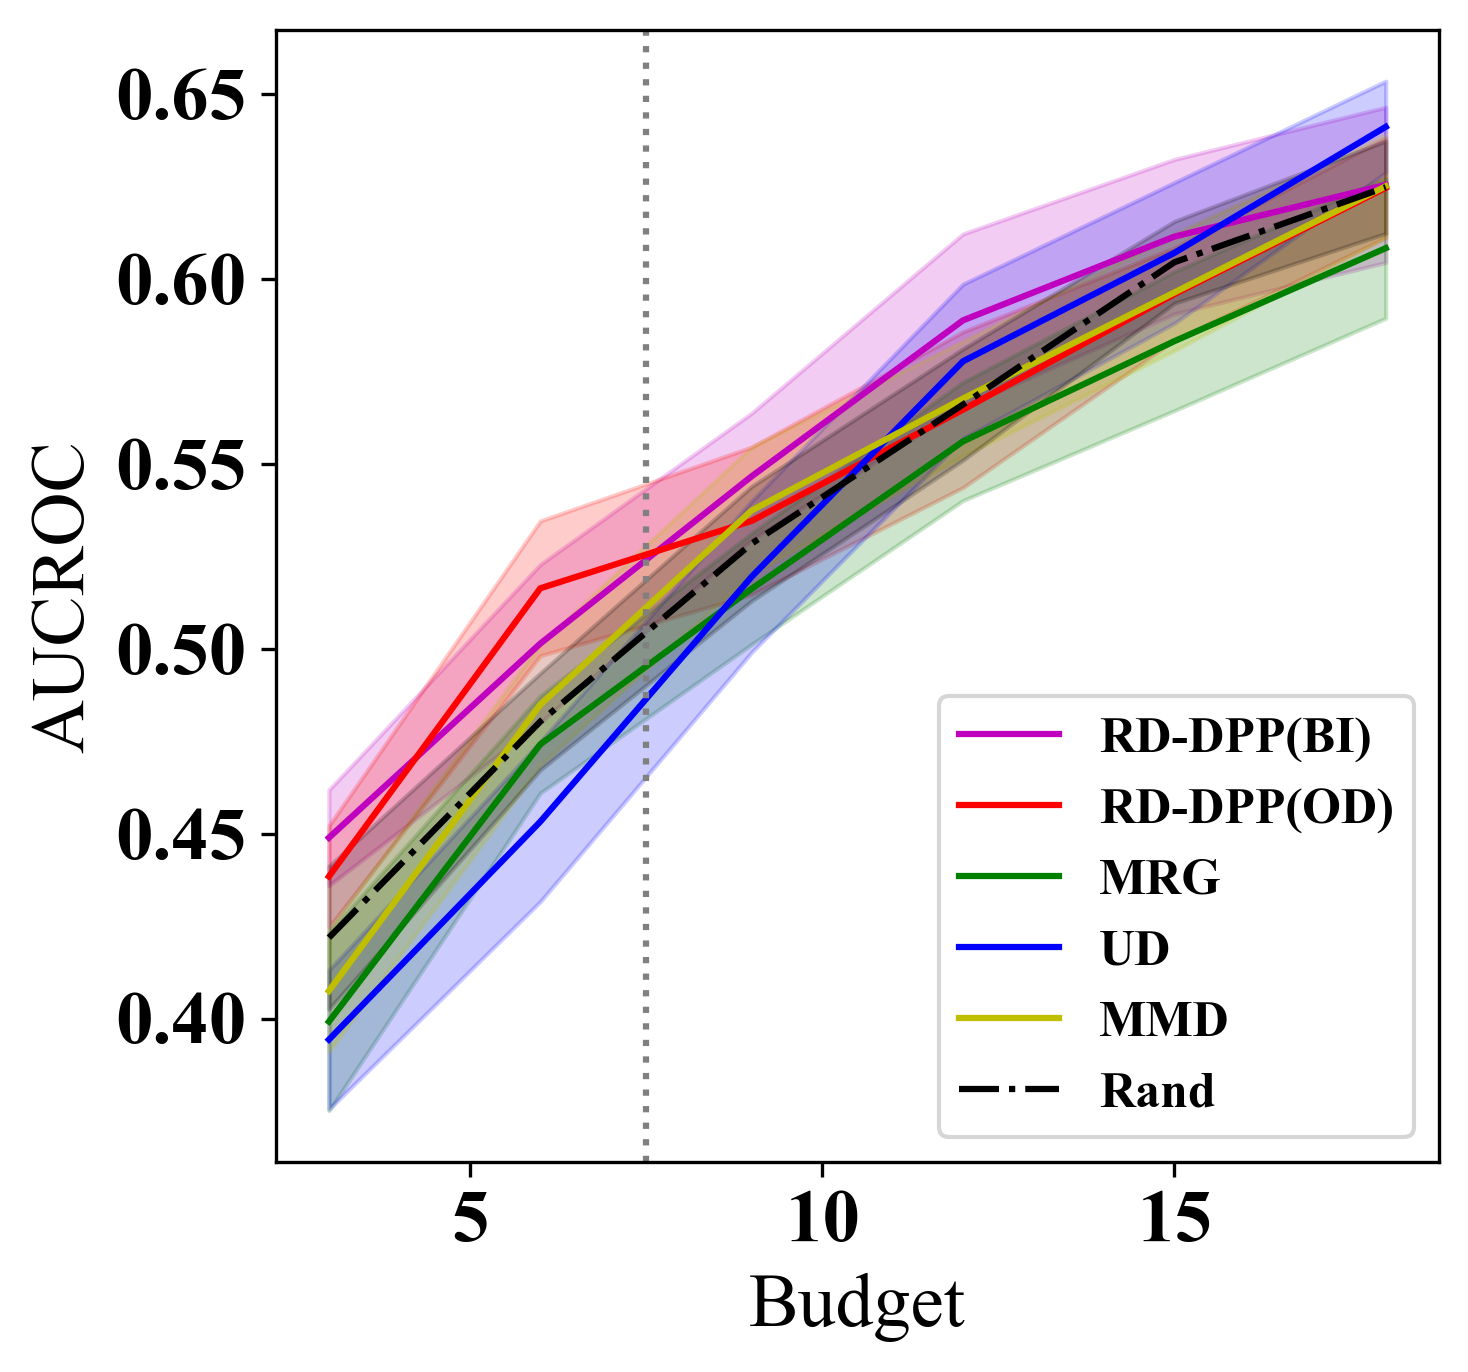

In [29]:
plt.figure(figsize= (5,5),dpi=300)

xaxis = np.array(range(1,7))*3

for j in range(7):
    if j !=1:
        idx = Method_index[j]
        plot_with_variance(Summaray[idx,:],np.sqrt(Summaray_var[idx,:]),color = color_space[j],xaxis=xaxis)

plt.xlabel('Budget')
plt.ylabel('AUCROC')

L2 = ['Rand','UD','MMD','MRG','RD-DPP(OD)','RD-DPP(BI)']
plt.legend(np.array(L2)[Method_inde2x])

plt.axvline(avg_trans*3,color='gray',linestyle=':')
plt.savefig(f'{dataset_name}.png', bbox_inches = 'tight')

In [30]:
# save to csv


In [41]:

L = ['Rand','Uncertainty Dec.','Min Margin Dec.','Marginal Rate Gain','RD-DPP (Bi-modal, phi=0.1)','RD-DPP (Bi-modal, phi=0.005)']


In [42]:
per1 = np.zeros((6,6),dtype=object)


In [43]:
S=Summaray[Method_inde2x,:]
SVAR = Summaray_var[Method_inde2x,:]

In [44]:
for i in range(per1.shape[0]):
    for j in range(per1.shape[1]):
        per1[i,j] = format(S[i,j]*100,'.2f')

In [45]:
import pandas as pd
df1 = pd.DataFrame(per1, columns = xaxis, index =np.array(L)[Method_inde2x])


In [46]:
df1

,3,6,9,12,15,18
"RD-DPP (Bi-modal, phi=0.005)",44.89,50.14,54.67,58.88,61.15,62.55
"RD-DPP (Bi-modal, phi=0.1)",43.84,51.64,53.46,56.47,59.59,62.47
Marginal Rate Gain,39.92,47.42,51.62,55.61,58.32,60.84
Uncertainty Dec.,39.43,45.33,51.95,57.78,60.71,64.12
Min Margin Dec.,40.75,48.49,53.74,56.77,59.64,62.51
Rand,42.19,48.03,52.85,56.61,60.46,62.48


In [47]:
# df1.to_csv(f'{dataset_name}_1.csv') 

In [48]:
per2 = np.zeros((6,6),dtype=object)
for i in range(per1.shape[0]):
    for j in range(per1.shape[1]):
        per2[i,j] = format(S[i,j]*100,'.2f')+'+-'+format(np.sqrt(SVAR[i,j])*100,'.2f')

In [49]:
df2 = pd.DataFrame(per2, columns = xaxis, index =np.array(L)[Method_inde2x])


In [50]:
df2

,3,6,9,12,15,18
"RD-DPP (Bi-modal, phi=0.005)",44.89+-2.59,50.14+-4.28,54.67+-3.42,58.88+-4.67,61.15+-4.18,62.55+-4.20
"RD-DPP (Bi-modal, phi=0.1)",43.84+-2.74,51.64+-3.65,53.46+-3.99,56.47+-4.21,59.59+-2.51,62.47+-2.69
Marginal Rate Gain,39.92+-4.82,47.42+-2.63,51.62+-3.00,55.61+-3.20,58.32+-3.76,60.84+-3.79
Uncertainty Dec.,39.43+-3.76,45.33+-4.32,51.95+-4.09,57.78+-4.17,60.71+-3.81,64.12+-2.47
Min Margin Dec.,40.75+-3.29,48.49+-3.27,53.74+-3.44,56.77+-3.10,59.64+-3.15,62.51+-2.77
Rand,42.19+-3.86,48.03+-2.62,52.85+-3.09,56.61+-3.01,60.46+-2.21,62.48+-2.50
